<a href="https://colab.research.google.com/github/esteban3622/Actividad_Final_U_Andes/blob/main/M4_Actividad_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Fin de módulo 4

Desarrollo del ejercicio por:
Esteban Ricardo Higuera Villalba


**Universidad de los Andes | Educación Continua**</br>
**Programa Analítica Agencia Atenea**</br>
*12 de septiembre de 2023*


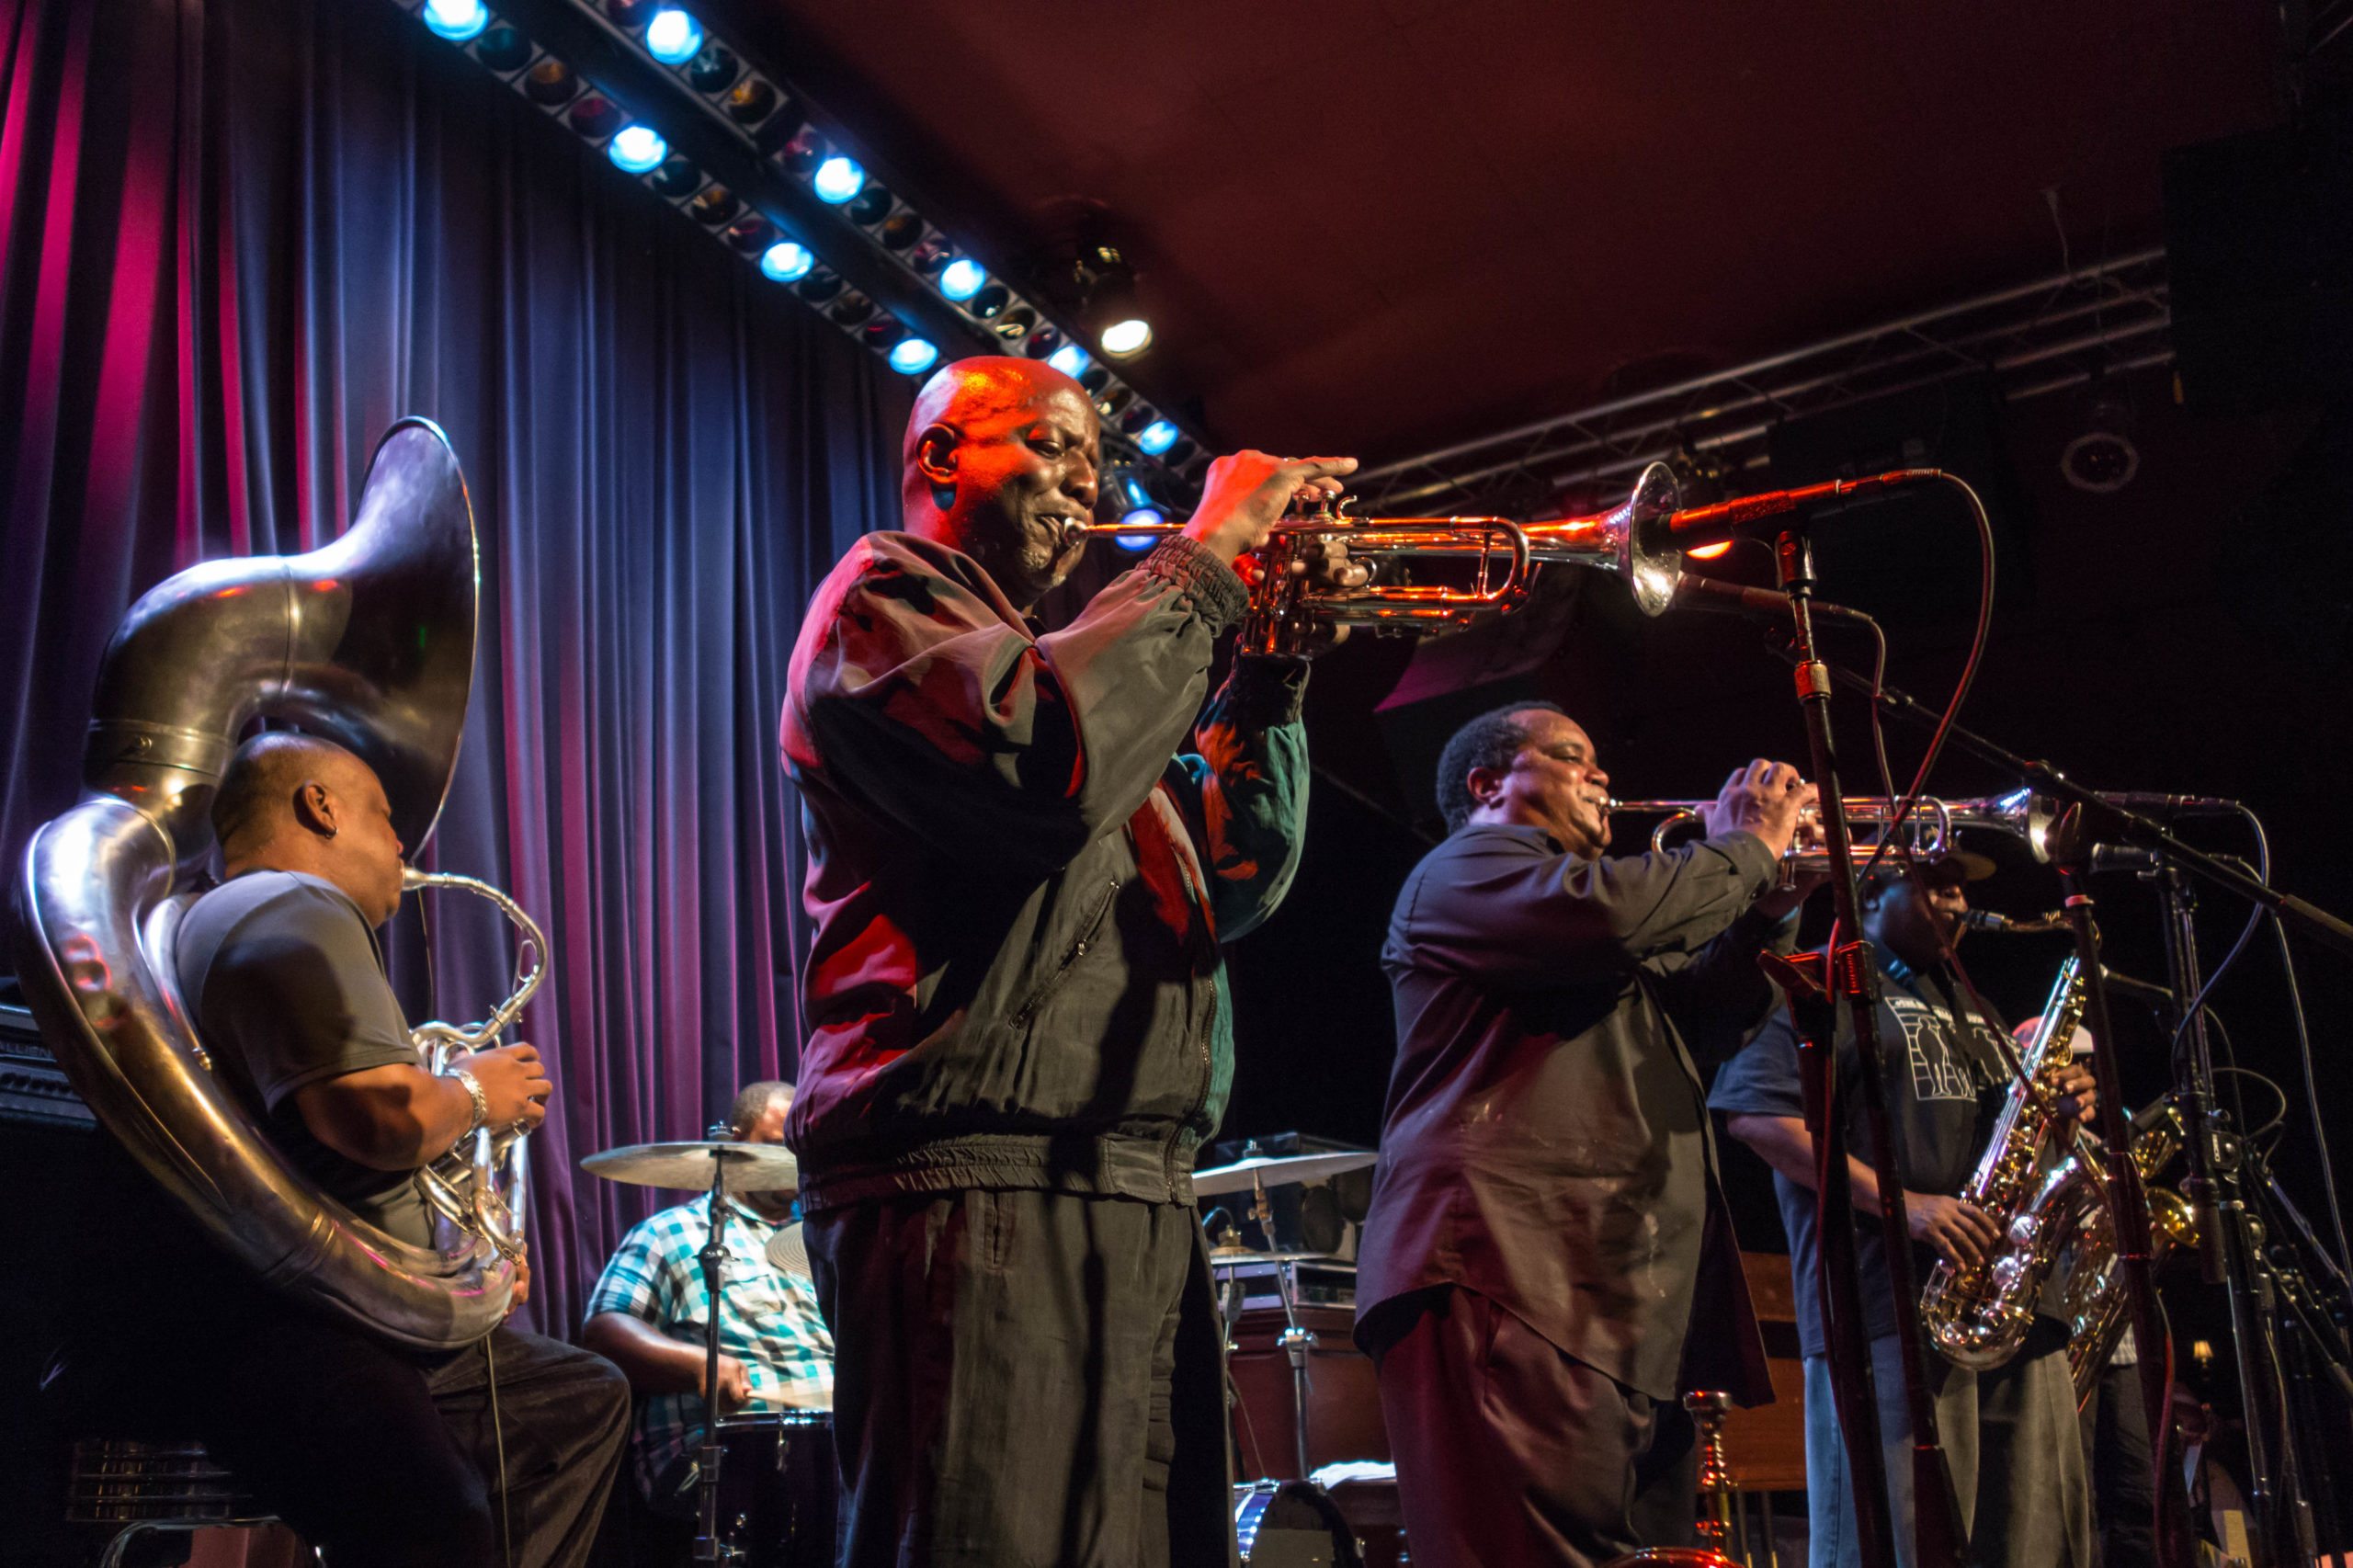

Para esta ocasión usted ha sido encargado/a con la elaboración de un modelo de clasificación que tome información de las piezas musicales y prediga en qué rango de reproducciones (streams) se ubicará esta en la plataforma Spotify.

La [base de datos](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) es la enlazada aquí. Cuenta con información formal y de percepción de más de 900 piezas musicales.

Ejecute a continuación las celdas de descripción de la base de datos, y entrene un modelo de clasificación pasando por todas las etapas de desarrollo indicadas.

In [ ]:
# Desactivar todas las advertencias
import warnings

warnings.filterwarnings("ignore")

## Carga de información
Clonación del repositorio ubicado en la plataforma de GitHub.

In [ ]:
# Clonar repositorio desde GitHub
! git clone https://github.com/esteban3622/Actividad_Final_U_Andes.git

Cloning into 'Actividad_Final_U_Andes'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (31/31), 53.73 KiB | 13.43 MiB/s, done.
Resolving deltas: 100% (5/5), done.


## Exploración

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv(r"Actividad_Final_U_Andes/data/spotify-2023.csv", encoding='ISO-8859-1')
datos.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
522,Surface Pressure,Jessica Darrow,1,2021,11,19,1756,0,267758538,38,...,180,D,Major,65,37,58,2,0,4,31
228,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin",2,2023,6,2,277,1,39666245,1,...,81,F#,Major,59,26,60,46,1,25,13
627,Bar,"Tini, L-Gante",2,2021,11,11,755,4,200972675,22,...,94,C#,Major,52,68,69,13,0,33,8
504,Out of Time,The Weeknd,1,2022,1,7,3711,0,339659802,49,...,93,NaN,Minor,65,82,74,27,0,32,5
337,Thinkinï¿½ï¿½ï¿½ B,Morgan Wallen,1,2023,3,3,604,6,125917280,22,...,140,D#,Minor,66,43,76,49,0,12,3


In [ ]:
datos2 = pd.read_csv(r"Actividad_Final_U_Andes/data/spotify_data_dict.csv")
datos2

,Column Name,Data Type,Description
0,track_name,object,Name of the song
1,artist(s)_name,object,Name of the artist(s) of the song
2,artist_count,int64,Number of artists contributing to the song
3,released_year,int64,Year when the song was released
4,released_month,int64,Month when the song was released
5,released_day,int64,Day of the month when the song was released
6,in_spotify_playlists,int64,Number of Spotify playlists the song is inclu...
7,in_spotify_charts,int64,Presence and rank of the song on Spotify charts
8,streams,object,Total number of streams on Spotify
9,in_apple_playlists,int64,Number of Apple Music playlists the song is i...


In [ ]:
datos['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

In [ ]:
datos.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
datos['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Limpieza

In [ ]:
# Filtrar canciones desde 2010 para reducir la cantidad de ruido que el modelo recibe por
# un contexto diferenciado
condicion = datos['released_year'] >= 2010
base = datos[condicion].copy()

In [ ]:
base['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2013     13
2014     13
2015     11
2018     10
2012     10
2011     10
2010      7
Name: released_year, dtype: int64

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            884 non-null    object
 1   artist(s)_name        884 non-null    object
 2   artist_count          884 non-null    int64 
 3   released_year         884 non-null    int64 
 4   released_month        884 non-null    int64 
 5   released_day          884 non-null    int64 
 6   in_spotify_playlists  884 non-null    int64 
 7   in_spotify_charts     884 non-null    int64 
 8   streams               884 non-null    object
 9   in_apple_playlists    884 non-null    int64 
 10  in_apple_charts       884 non-null    int64 
 11  in_deezer_playlists   884 non-null    object
 12  in_deezer_charts      884 non-null    int64 
 13  in_shazam_charts      839 non-null    object
 14  bpm                   884 non-null    int64 
 15  key                   796 non-null    ob

In [ ]:
base['streams'] = base['streams'].astype(int)

### Convertimos la variable Y continua en categórica

In [ ]:
base['Max_streams_C'] = ''
media = base['streams'].mean()
base['Max_streams_C'].loc[(base['streams'] >= media)] = 'Más de '+str(round(media/10e6))+' mill. de streams'
base['Max_streams_C'].loc[(base['streams'] < media)] = 'Menos de '+str(round(media/10e6))+' mill. de streams'

In [ ]:
base[['streams', 'Max_streams_C']]

,streams,Max_streams_C
0,141381703,Menos de 49 mill. de streams
1,133716286,Menos de 49 mill. de streams
2,140003974,Menos de 49 mill. de streams
3,800840817,Más de 49 mill. de streams
4,303236322,Menos de 49 mill. de streams
...,...,...
948,91473363,Menos de 49 mill. de streams
949,121871870,Menos de 49 mill. de streams
950,73513683,Menos de 49 mill. de streams
951,133895612,Menos de 49 mill. de streams


## Algunas descriptivas

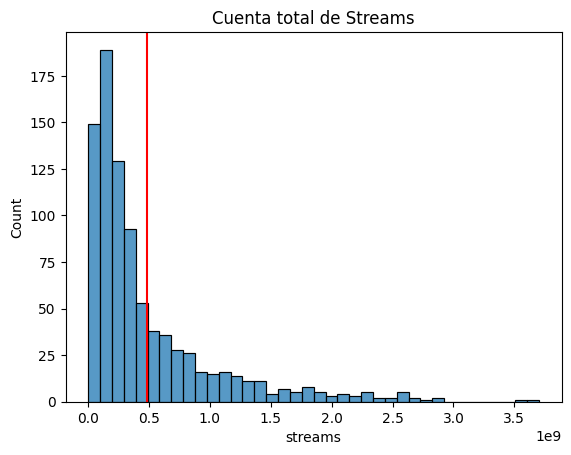

In [ ]:
plt.title('Cuenta total de Streams')
sns.histplot(data=base, x="streams")
plt.axvline(base['streams'].mean(), color='red')

**Nota:** Vemos que es una base de datos de música muy top en el mercado. El promedio de streams es 400 millones (relativamente alto).

In [ ]:
base['streams'].describe()

count    8.840000e+02
mean     4.851801e+08
std      5.564953e+08
min      2.762000e+03
25%      1.366863e+08
50%      2.720219e+08
75%      6.082550e+08
max      3.703895e+09
Name: streams, dtype: float64

In [ ]:
base['Max_streams_C'].value_counts()

Menos de 49 mill. de streams    612
Más de 49 mill. de streams      272
Name: Max_streams_C, dtype: int64

## Modelo para contrastar

### Logit

El objetivo del ejercicio es que usted construya un clasificador diferente al del modelo logarítmico y compare sus resultados contra este. Tenemos principalmente dos categorías:

* Entre **Menos de 49 mill. de streams**
* Entre **Más de 49 mill. de streams**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definimos 1 como estar en la categoría de muchos streams
y = base['Max_streams_C'] == 'Más de 49 mill. de streams'
y = y + [0] * len(y)
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Max_streams_C, dtype: int64

In [ ]:
X = base[['in_spotify_playlists', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
X.head()

,in_spotify_playlists,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,553,80,89,83,31,0,8,4
1,1474,71,61,74,7,0,10,4
2,1397,51,32,53,17,0,31,6
3,7858,55,58,72,11,0,11,15
4,3133,65,23,80,14,63,11,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
modeloLog  = LogisticRegression(random_state=16)

In [ ]:
# Ajustamos el modelo con los datos de entrenamiento (70%)
modeloLog.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [ ]:
probabilidades = modeloLog.predict_proba(X_test)[:,1]

In [ ]:
from sklearn import metrics

In [ ]:
umbral = 0.2
pred = probabilidades >= umbral
pred = pred + [0] * len(pred)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
matriz = metrics.confusion_matrix(y_test, pred)
matriz

array([[162,  22],
       [  8,  74]])

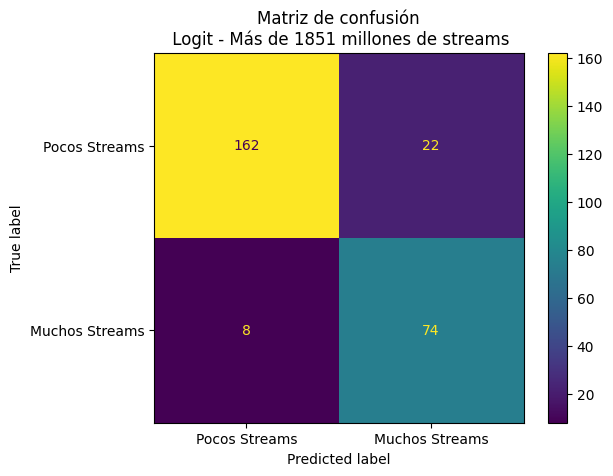

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión\n Logit - Más de 1851 millones de streams")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculo de Accuracy
accuracy = accuracy_score(y_test, pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8872180451127819


## Modelo alternativo (15 puntos)

Para este ejercicio, siga las siguientes instrucciones. No se tendrá en cuenta si su modelo mejora el desempeño de la predicción, sino la rigurosidad de su desarrollo.

### 1. Escoja un nuevo modelo de clasificación

In [ ]:
# Recuerde que contamos con las siguientes bases:
# X_train, X_test, y_train, y_test

### 2. Entrene el modelo

### 3. Haga las predicciones correspondientes

### 4. Elabore la matriz de confusión y calcule la precisión (accuracy)

### 5. Haga un análisis de hiperparámetros para escoger la mejor versión de su modelo

### 6. Escoja entre el modelo logit y su modelo a la luz de sus resultados, comente

**Comentario:**

## Análisis de resultados (10 puntos)

Realice un análisis de resultados corto (hasta 300 palabras) considerando:
- Datos trabajados (1 punto)
- Resultados obtenidos (3 puntos)
- Cifras principales de los resultados obtenidos (2 puntos)
- Consideraciones sobre el modelo o modelos escogidos de comparación (2 puntos)
- Limitaciones del análisis ( 2 puntos)

### Forma del notebook (5 puntos)
Criterios:
* El notebook incluye código funcional y presenta los resultados (3 puntos)
* Los resultados se encuentran cometados dentro del notebook (1 punto)
* El código se encuentra comentado explicando qué realiza cada componente y las observaciones relevantes sobre implementación (1 punto)

# Puntos extra (hasta 5 puntos)
Hasta 5 puntos adicionales si se incluyen uno o varios de los siguientes componentes:
- Analisis exploratorio de datos
- Incluir componentes de Crisp DM
- Técnicas adicionales, si palican (clustering, ACP)
- Caracterización y tratamiento de faltantes y atípicos

# Propuesta de solución
Con el fin de realizar exponer las diferentes herramientas, habilidad y conceptos aprendidos durantes el desarrollo del curso se describe de manera superficial la metodología a emplear. Donde se destaca el proceso de exploración, validación e identificación de la base de datos y variables útiles para el modelo. En terminos de los modelos a utilizar se explorará la Regresión Logistica y el Random Forest. A partir de estos modelos se realizará una comparación de su rendimiento, variando hiperparametros u otros parametros, cabe señalar que estos modelos y sus variaciones tendrán en común los datos de entrenamiento y prueba, en ambos casos se emplea Cross-Validation. Es importante aclarar que las demás consideraciones se expondran a medida que se avance en el trabajo.

## Exploración de los datos
En esta primera etapa se examina las caracteristica que posee la base de datos, teniendo en cuenta que no se descarta o elimina ningún dato y solo se describe los hallazgos durante el proceso para una próxima etapa.

In [ ]:
print('La base de datos cuenta con', datos.shape[0], 'datos y', datos.shape[1], 'atributos.')

La base de datos cuenta con 953 datos y 24 atributos.


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
print('La base de datos cuenta con los siguientes tipos de datos:', datos.dtypes.unique())
print('Del tipo', datos.dtypes.unique()[1], 'se tienen:',datos.dtypes.value_counts()[0])
print('Del tipo', datos.dtypes.unique()[0], 'se tienen:',datos.dtypes.value_counts()[1])

La base de datos cuenta con los siguientes tipos de datos: [dtype('O') dtype('int64')]
Del tipo int64 se tienen: 17
Del tipo object se tienen: 7


In [ ]:
print('Los atributos de tipo Object son:',list(datos.select_dtypes('O').columns))
print('Los atributos de tipo int64 son:',list(datos.select_dtypes('int64').columns))

Los atributos de tipo Object son: ['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']
Los atributos de tipo int64 son: ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [ ]:
# Configurar las opciones de visualización para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

datos.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6


NOTA. Pese a los resultados anteriores, de acuerdo a un análisis visual detallado de los datos se detecta que la cantidad de datos tipo Object y int64 es completamente diferente:
- int64: 20
- Object: 4

In [ ]:
# Identificar variables con datos nulos y contarlos
nulos_por_variable = datos.isnull().sum()

# Filtrar para mostrar solo las variables con datos nulos
variables_con_nulos = nulos_por_variable[nulos_por_variable > 0]

# Creación de un DataFrame con valores Nulos y cantidad
df_dataNull = variables_con_nulos.to_frame(name='Cantidad Nulos')

print('Las variables que tienen datos nulos y su cantidad son:')
df_dataNull

Las variables que tienen datos nulos y su cantidad son:


,Cantidad Nulos
in_shazam_charts,50
key,95


In [ ]:
datos2[['Column Name', 'Description']]

,Column Name,Description
0,track_name,Name of the song
1,artist(s)_name,Name of the artist(s) of the song
2,artist_count,Number of artists contributing to the song
3,released_year,Year when the song was released
4,released_month,Month when the song was released
5,released_day,Day of the month when the song was released
6,in_spotify_playlists,Number of Spotify playlists the song is inclu...
7,in_spotify_charts,Presence and rank of the song on Spotify charts
8,streams,Total number of streams on Spotify
9,in_apple_playlists,Number of Apple Music playlists the song is i...


Teniendo en cuenta los nombres de las variables y la descripción se realiza una exploración de los correspondientes a las variables con informaición en  porcentajes

In [ ]:
# Creación de un DataFrame con solo los valores de porcentaje
df_percentage = datos[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

# Obtener los valores máximos y mínimos de cada variable
maximos = df_percentage.max()
minimos = df_percentage.min()

# Combina los resultados en un nuevo DataFrame
resumen = pd.DataFrame({'Maximo': maximos, 'Minimo': minimos})
resumen

,Maximo,Minimo
danceability_%,96,23
valence_%,97,4
energy_%,97,9
acousticness_%,97,0
instrumentalness_%,91,0
liveness_%,97,3
speechiness_%,64,2


Otro conjunto de variables que pueden ser exploradas para identificar datos atipicos son: Año, Mes y Día de lanzamiento de la canción.

In [ ]:
# Creación de un DataFrame con solo los valores de porcentaje
df_released = datos[['released_year', 'released_month', 'released_day']]

# Obtener los valores máximos y mínimos de cada variable
maximos = df_released.max()
minimos = df_released.min()

# Combina los resultados en un nuevo DataFrame
resumen = pd.DataFrame({'Maximo': maximos, 'Minimo': minimos})
resumen

,Maximo,Minimo
released_year,2023,1930
released_month,12,1
released_day,31,1


## Análisis de los datos


De acuerdo al primer resultado que se obtuvo de la exploración de los datos, es necesario convertir los datos que sean Object a int64, así poder localizar realmente cuantos datos nulos cuenta la base de datos.

In [ ]:
# Conversión de datos Objeto a Int64 de la columna 'in_shazam_charts', 'in_deezer_playlists' y 'streams'
datos['in_shazam_charts'] = pd.to_numeric(datos['in_shazam_charts'], errors='coerce').astype('Int64')
datos['in_deezer_playlists'] = pd.to_numeric(datos['in_deezer_playlists'], errors='coerce').astype('Int64')
datos['streams'] = pd.to_numeric(datos['streams'], errors='coerce').astype('Int64')
print(datos.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


Con la intensión de identificar que variables numericas son importantes para la elaboración de los modelos. Se realizará los siguientes pasos.
1. Eliminar los datos nulos de las variables númericas en la base de datos.
2. El objetivo de eliminar estos datos nulos, es la explorar el aporte que genera dicha variable que posee estos datos nulos contra la variable dependiente, ya que si el aporte llega a ser despreciable, se procede a reviertir la eliminación de estos datos, así tener la totalidad de los datos.  

In [ ]:
# Eliminar los datos nulos de las variables numericas
datosSinNulosNum = datos.dropna(subset=['in_shazam_charts'])
datosSinNulosNum = datosSinNulosNum.dropna(subset=['in_deezer_playlists'])
datosSinNulosNum = datosSinNulosNum.dropna(subset=['streams'])
print(datosSinNulosNum.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     81
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [ ]:
# Conversión de Int64 a int64
datosSinNulosNum['in_shazam_charts'] = datosSinNulosNum['in_shazam_charts'].astype('int64')
datosSinNulosNum['in_deezer_playlists'] = datosSinNulosNum['in_deezer_playlists'].astype('int64')
datosSinNulosNum['streams'] = datosSinNulosNum['streams'].astype('int64')
print(datosSinNulosNum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            829 non-null    object
 1   artist(s)_name        829 non-null    object
 2   artist_count          829 non-null    int64 
 3   released_year         829 non-null    int64 
 4   released_month        829 non-null    int64 
 5   released_day          829 non-null    int64 
 6   in_spotify_playlists  829 non-null    int64 
 7   in_spotify_charts     829 non-null    int64 
 8   streams               829 non-null    int64 
 9   in_apple_playlists    829 non-null    int64 
 10  in_apple_charts       829 non-null    int64 
 11  in_deezer_playlists   829 non-null    int64 
 12  in_deezer_charts      829 non-null    int64 
 13  in_shazam_charts      829 non-null    int64 
 14  bpm                   829 non-null    int64 
 15  key                   748 non-null    ob

In [ ]:
print('El DB original posee', datos.shape[0], 'datos. Con el proceso realizado se redujo a', datosSinNulosNum.shape[0], 'datos.',
      '\n Es decir, la diferencia de datos es de', datos.shape[0]-datosSinNulosNum.shape[0],'lo cual representa el',
      round((1-(datosSinNulosNum.shape[0]/datos.shape[0]))*100,2), '% menos de datos.')

El DB original posee 953 datos. Con el proceso realizado se redujo a 829 datos. 
 Es decir, la diferencia de datos es de 124 lo cual representa el 13.01 % menos de datos.


In [ ]:
# Selección de los datos tipo númerico
X_temp = datosSinNulosNum.select_dtypes('int64')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos en el DataFrame
X_temp_std = pd.DataFrame(scaler.fit_transform(X_temp), columns=X_temp.columns)

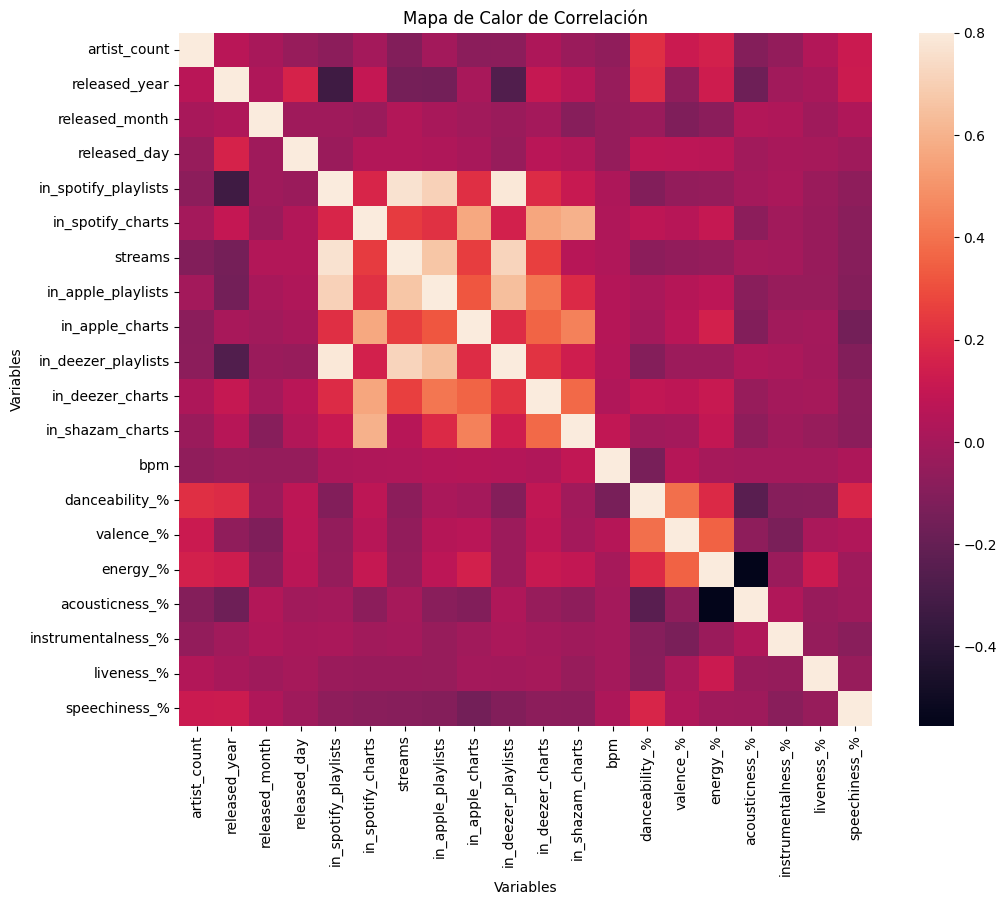

In [ ]:
import pandas as pd

# Calcula la matriz de correlación
correlation_matrix = X_temp_std.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=.8, square=True)

plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
# Cantidad de variables con correlación superior a 0.65 y listado de las variables
dataTemp = correlation_matrix['streams'].abs()>0.65
print('Cantidad de elementos con correlación:', dataTemp.sum())
print('Lista de las variables con mayor correlación:')
for i in range(X_temp_std.shape[1]-4):
  if dataTemp[i]:
    print('- ' + dataTemp.index.tolist()[i])

Cantidad de elementos con correlación: 4
Lista de las variables con mayor correlación:
- in_spotify_playlists
- streams
- in_apple_playlists
- in_deezer_playlists


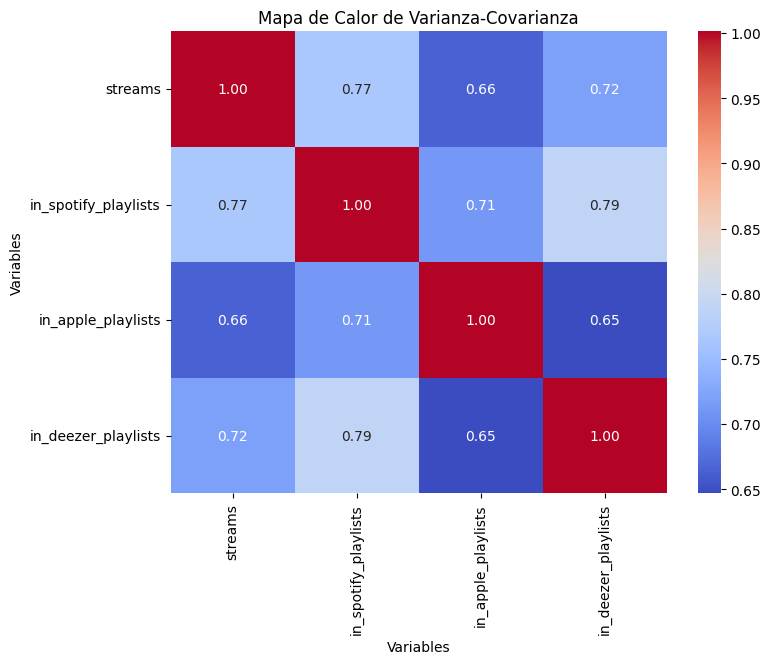

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de varianza-covarianza
cov_matrix = X_temp_std[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].cov()

# # Mostrar la matriz de varianza-covarianza
# print("Matriz de Varianza-Covarianza:")
# print(cov_matrix)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade etiquetas de ejes y título
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Mapa de Calor de Varianza-Covarianza')

# Muestra el mapa de calor
plt.show()

De acuerdo con los resultados anteriores, es posible afirmar que eliminar o descartar datos a partir de la fecha de publicacion, no brinda ningun beneficio. Por ende, se trabaja con las variables resultantes.

## Transformando la variable dependiente a formato binario

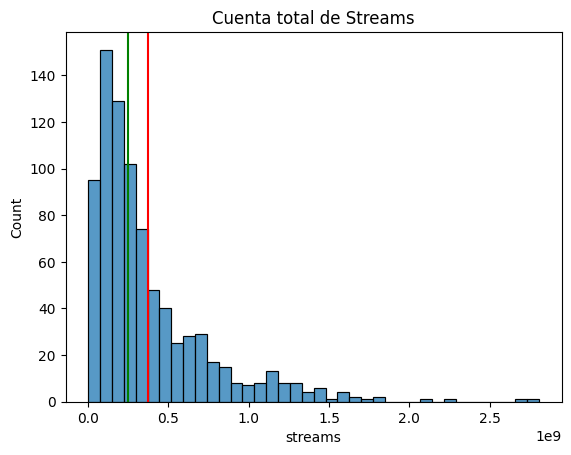

In [ ]:
plt.title('Cuenta total de Streams')
sns.histplot(data=X_temp, x="streams")
plt.axvline(X_temp['streams'].mean(), color='red')
plt.axvline(X_temp['streams'].median(), color='green') ## Esta deberia ser la correcta

La anterior grafica permite renocer la distribucion de los datos a partir de la cantidad de reproducciones, donde se identifica que los datos con mayor reproduccion posee pocas repeticiones, mientras que los datos con menores repeticiones cuenta con una distribucion mayor.

Ademas, teniendo en cuenta variables de medida central como la media y la mediana es posible determinar la categorización de la variable 'stream', recordando que la media puede ser sensible a datos de gran magnitud, caso contrario a la mediana.

In [ ]:
df_Data = X_temp[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams']]

In [ ]:
# Media
df_Data['Max_streams_C'] = ''
media = df_Data['streams'].mean()
df_Data['Max_streams_C'].loc[(df_Data['streams'] >= media)] = 'Más de '+str(round(media/1e6))+' millones de streams'
df_Data['Max_streams_C'].loc[(df_Data['streams'] < media)] = 'Menos de '+str(round(media/1e6))+' millones de streams'
print(df_Data['Max_streams_C'].value_counts())

df_DB1 = df_Data.copy()

Menos de 374 millones de streams    554
Más de 374 millones de streams      275
Name: Max_streams_C, dtype: int64


In [ ]:
# Mediana
df_Data['Max_streams_C'] = ''
mediana = df_Data['streams'].median()
df_Data['Max_streams_C'].loc[(df_Data['streams'] >= mediana)] = 'Más de '+str(round(mediana/1e6))+' millones de streams'
df_Data['Max_streams_C'].loc[(df_Data['streams'] < mediana)] = 'Menos de '+str(round(mediana/1e6))+' millones de streams'
print(df_Data['Max_streams_C'].value_counts())

df_DB4 = df_Data.copy()

Más de 245 millones de streams      415
Menos de 245 millones de streams    414
Name: Max_streams_C, dtype: int64


El resultado de la clasificación permite resaltar el problema que posee la media vs la mediana en este caso particular ya que se presentan canciones con alta cantidad de reproducción. En otra palabras, podemos mencionar que al trabajar con la media genera una base de datos desbalanceada.

## Diferentes bases de datos generadas
Al examinar de manera particular la forma de clasificar la variable 'stream' es posible mencionar que existen cuatro posibles bases de datos que se pueden formular y probar al momento de realizar los modelos. Estos modelos tendrian la siguientes caracteristicas:

1. DB empleando la Media (*Desbalanceada*) -> DB1
2. DB empleando la Media (*Balanceada por submuestreo*) -> DB2
3. DB empleando la Media (*Balanceada por sobremuestreo*) -> DB3
4. DB empleando la Mediana (*Balanceada*) -> DB4

In [ ]:
# Base de datos 1 - Media (Desbalanceada)
print('La dimensión de la base de datos es:', df_DB1.shape)

La dimensión de la base de datos es: (829, 5)


In [ ]:
# Definimos 1 como estar en la categoría de muchos streams
df_DB1['streams_Bin'] = df_DB1['Max_streams_C'] == 'Más de 374 millones de streams'
df_DB1['streams_Bin'] = df_DB1['streams_Bin'] + [0] * len(df_DB1['streams_Bin'])
df_DB1.sample(4)

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,streams,Max_streams_C,streams_Bin
137,182,3,1,54225632,Menos de 374 millones de streams,0
432,10426,133,182,826623384,Más de 374 millones de streams,1
389,3006,47,87,480507035,Más de 374 millones de streams,1
363,1769,16,21,362361576,Menos de 374 millones de streams,0


In [ ]:
# Base de datos 2 - Media Submuestreo

from sklearn.utils import resample

# Supongamos que tienes un DataFrame df y 'Clase' es la columna objetivo
clase_mayoritaria = df_DB1[df_DB1['streams_Bin'] == 0]
clase_minoritaria = df_DB1[df_DB1['streams_Bin'] == 1]

# Submuestrear la clase mayoritaria
clase_mayoritaria_submuestreada = resample(clase_mayoritaria, replace=False, n_samples=len(clase_minoritaria), random_state=42)

# Combinar las clases submuestreada y minoritaria
df_balanceado = pd.concat([clase_mayoritaria_submuestreada, clase_minoritaria])
df_DB2 = df_balanceado.copy()

In [ ]:
# Base de datos 3 - Media Sobremuestreo

from sklearn.utils import resample

# Supongamos que tienes un DataFrame df y 'Clase' es la columna objetivo
clase_mayoritaria = df_DB1[df_DB1['streams_Bin'] == 0]
clase_minoritaria = df_DB1[df_DB1['streams_Bin'] == 1]

# Sobremuestrear la clase minoritaria
clase_minoritaria_sobremuestreada = resample(clase_minoritaria, replace=True, n_samples=len(clase_mayoritaria), random_state=42)

# Combinar las clases sobremuestreada y mayoritaria
df_balanceado = pd.concat([clase_mayoritaria, clase_minoritaria_sobremuestreada])
df_DB3 = df_balanceado.copy()

In [ ]:
# Base de datos 4 - Mediana
print('La dimensión de la base de datos es:', df_DB4.shape)

La dimensión de la base de datos es: (829, 5)


In [ ]:
# Definimos 1 como estar en la categoría de muchos streams
df_DB4['streams_Bin'] = df_DB4['Max_streams_C'] == 'Más de 245 millones de streams'
df_DB4['streams_Bin'] = df_DB4['streams_Bin'] + [0] * len(df_DB4['streams_Bin'])
df_DB4.sample(4)

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,streams,Max_streams_C,streams_Bin
418,4169,57,183,482257456,Más de 245 millones de streams,1
716,1188,13,15,312622938,Más de 245 millones de streams,1
730,1105,32,19,240661097,Menos de 245 millones de streams,0
335,5730,108,197,497225336,Más de 245 millones de streams,1


In [ ]:
# Obtener dimensiones de cada DataFrame
dimensiones = {'DataFrame': ['df_DB1', 'df_DB2', 'df_DB3', 'df_DB4'],
               'Filas': [df_DB1.shape[0], df_DB2.shape[0], df_DB3.shape[0], df_DB4.shape[0]],
               'Columnas': [df_DB1.shape[1], df_DB2.shape[1], df_DB3.shape[1], df_DB4.shape[1]]}

# Crear un nuevo DataFrame para comparar dimensiones
df_dimensiones = pd.DataFrame(dimensiones)

# Mostrar el DataFrame de comparación de dimensiones
print(df_dimensiones)

  DataFrame  Filas  Columnas
0    df_DB1    829         6
1    df_DB2    550         6
2    df_DB3   1108         6
3    df_DB4    829         6


Los cuatro escenarios propuestos serán utilizados en los dos modelos propuestos. Por ende, se inicia con el *Modelo de Regresión Logística*, realizando una comparativa entre el modelo por deafult y un modelos variando dos hiperparametros.

## Modelo de Regresión Logística DB1
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- max_iter=100
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB1[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB1.streams_Bin

# Crear un modelo de clasificación (Regresión Logística)
modelo = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs')

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.1749


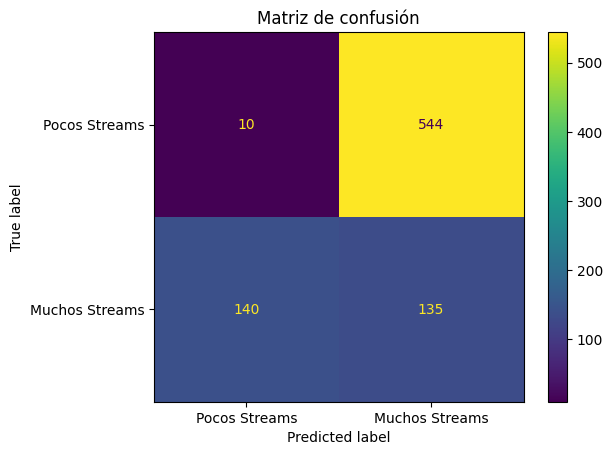

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB1[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB1.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='lbfgs')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.2545
Max Iteraciones: 50, Precisión del modelo: 0.1809
Max Iteraciones: 75, Precisión del modelo: 0.1749
Max Iteraciones: 100, Precisión del modelo: 0.1749
Max Iteraciones: 125, Precisión del modelo: 0.1749
Max Iteraciones: 150, Precisión del modelo: 0.1749
Max Iteraciones: 175, Precisión del modelo: 0.1749
Max Iteraciones: 200, Precisión del modelo: 0.1749
Max Iteraciones: 225, Precisión del modelo: 0.1749
Max Iteraciones: 250, Precisión del modelo: 0.1749


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


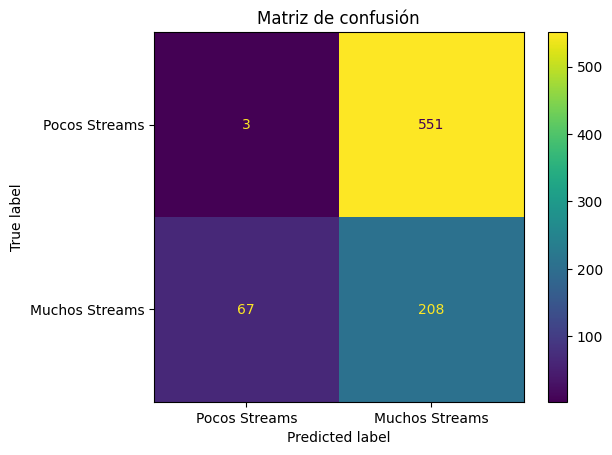

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='liblinear'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB1[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB1.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='liblinear')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.1797
Max Iteraciones: 50, Precisión del modelo: 0.1797
Max Iteraciones: 75, Precisión del modelo: 0.1797
Max Iteraciones: 100, Precisión del modelo: 0.1797
Max Iteraciones: 125, Precisión del modelo: 0.1797
Max Iteraciones: 150, Precisión del modelo: 0.1797
Max Iteraciones: 175, Precisión del modelo: 0.1797
Max Iteraciones: 200, Precisión del modelo: 0.1797
Max Iteraciones: 225, Precisión del modelo: 0.1797
Max Iteraciones: 250, Precisión del modelo: 0.1797


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


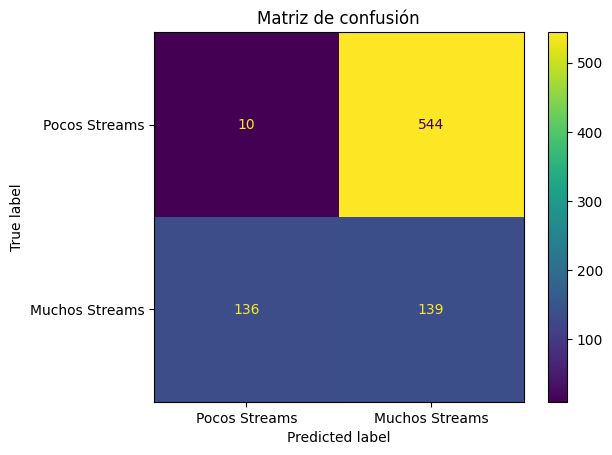

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Regresión Logística DB2
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- max_iter=100
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB2[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB2.streams_Bin

# Crear un modelo de clasificación (Regresión Logística)
modelo = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs')

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.2145


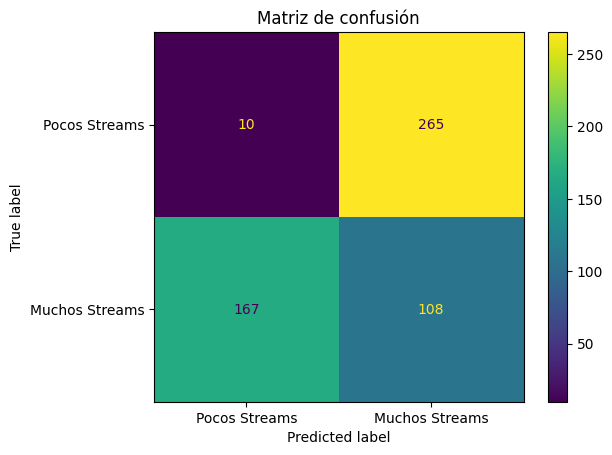

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB2[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB2.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='lbfgs')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.2764
Max Iteraciones: 50, Precisión del modelo: 0.2145
Max Iteraciones: 75, Precisión del modelo: 0.2145
Max Iteraciones: 100, Precisión del modelo: 0.2145
Max Iteraciones: 125, Precisión del modelo: 0.2145
Max Iteraciones: 150, Precisión del modelo: 0.2145
Max Iteraciones: 175, Precisión del modelo: 0.2145
Max Iteraciones: 200, Precisión del modelo: 0.2145
Max Iteraciones: 225, Precisión del modelo: 0.2145
Max Iteraciones: 250, Precisión del modelo: 0.2145


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


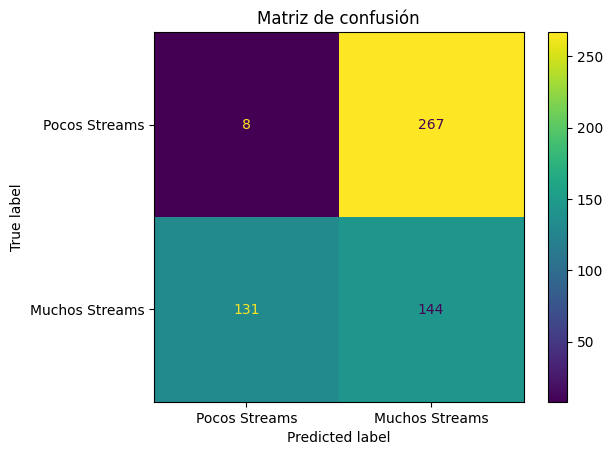

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='liblinear'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB2[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB2.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='liblinear')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.2182
Max Iteraciones: 50, Precisión del modelo: 0.2182
Max Iteraciones: 75, Precisión del modelo: 0.2182
Max Iteraciones: 100, Precisión del modelo: 0.2182
Max Iteraciones: 125, Precisión del modelo: 0.2182
Max Iteraciones: 150, Precisión del modelo: 0.2182
Max Iteraciones: 175, Precisión del modelo: 0.2182
Max Iteraciones: 200, Precisión del modelo: 0.2182
Max Iteraciones: 225, Precisión del modelo: 0.2182
Max Iteraciones: 250, Precisión del modelo: 0.2182


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


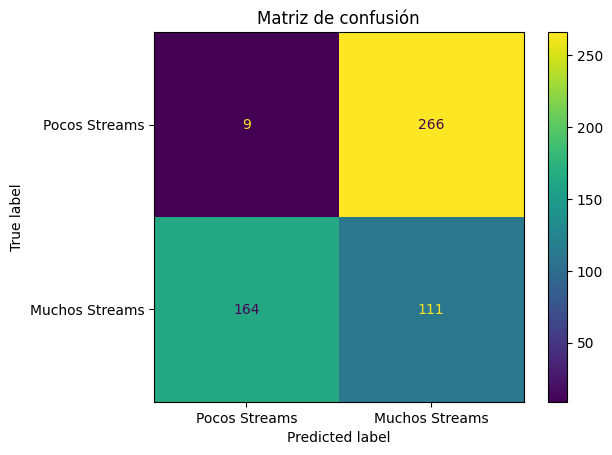

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Regresión Logística DB3
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- max_iter=100
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB3[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB3.streams_Bin

# Crear un modelo de clasificación (Regresión Logística)
modelo = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs')

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.2067


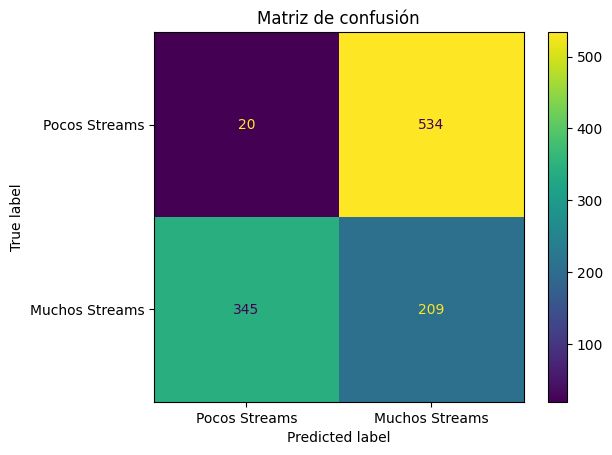

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB3[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB3.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='lbfgs')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.2690
Max Iteraciones: 50, Precisión del modelo: 0.2067
Max Iteraciones: 75, Precisión del modelo: 0.2067
Max Iteraciones: 100, Precisión del modelo: 0.2067
Max Iteraciones: 125, Precisión del modelo: 0.2067
Max Iteraciones: 150, Precisión del modelo: 0.2067
Max Iteraciones: 175, Precisión del modelo: 0.2067
Max Iteraciones: 200, Precisión del modelo: 0.2067
Max Iteraciones: 225, Precisión del modelo: 0.2067
Max Iteraciones: 250, Precisión del modelo: 0.2067


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


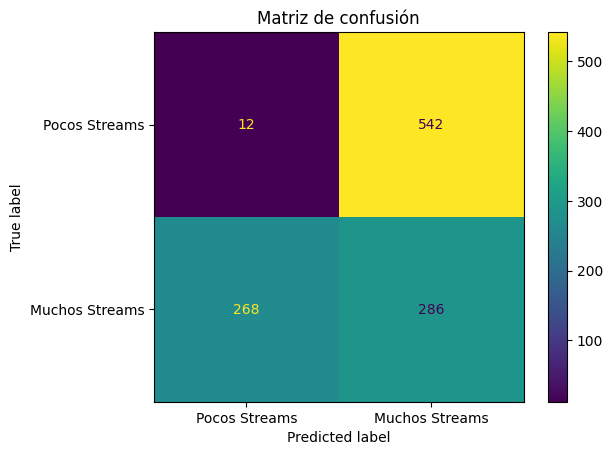

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='liblinear'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB3[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB3.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='liblinear')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.2103
Max Iteraciones: 50, Precisión del modelo: 0.2103
Max Iteraciones: 75, Precisión del modelo: 0.2103
Max Iteraciones: 100, Precisión del modelo: 0.2103
Max Iteraciones: 125, Precisión del modelo: 0.2103
Max Iteraciones: 150, Precisión del modelo: 0.2103
Max Iteraciones: 175, Precisión del modelo: 0.2103
Max Iteraciones: 200, Precisión del modelo: 0.2103
Max Iteraciones: 225, Precisión del modelo: 0.2103
Max Iteraciones: 250, Precisión del modelo: 0.2103


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


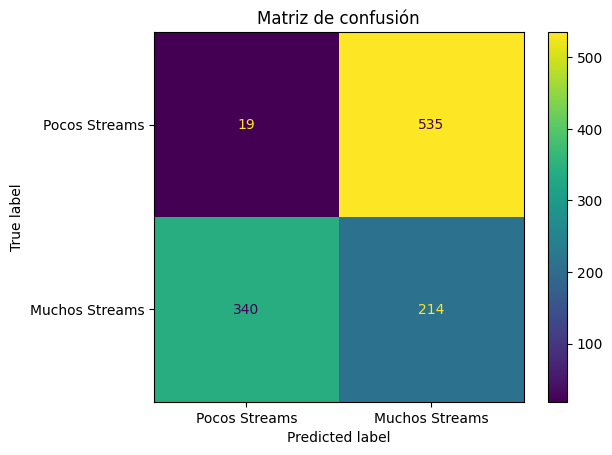

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Regresión Logística DB4
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- max_iter=100
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB4[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB4.streams_Bin

# Crear un modelo de clasificación (Regresión Logística)
modelo = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs')

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.2557


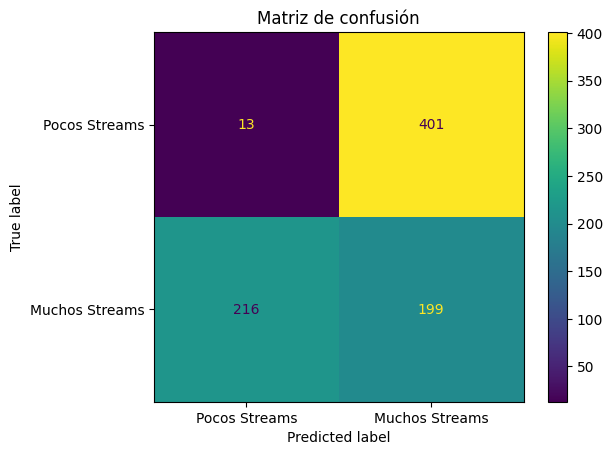

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB4[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB4.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='lbfgs')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.3221
Max Iteraciones: 50, Precisión del modelo: 0.2521
Max Iteraciones: 75, Precisión del modelo: 0.2557
Max Iteraciones: 100, Precisión del modelo: 0.2557
Max Iteraciones: 125, Precisión del modelo: 0.2557
Max Iteraciones: 150, Precisión del modelo: 0.2557
Max Iteraciones: 175, Precisión del modelo: 0.2557
Max Iteraciones: 200, Precisión del modelo: 0.2557
Max Iteraciones: 225, Precisión del modelo: 0.2557
Max Iteraciones: 250, Precisión del modelo: 0.2557


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


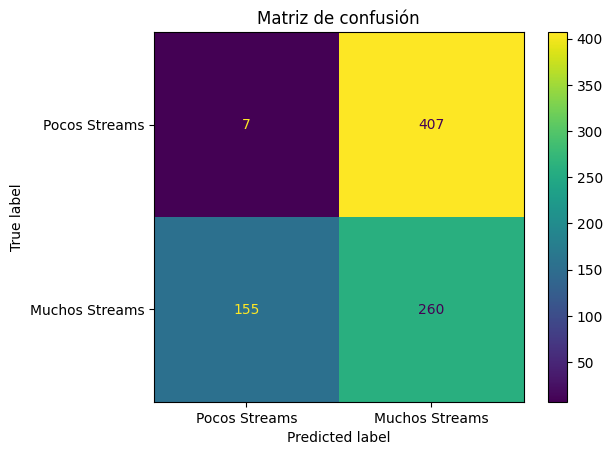

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='liblinear'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB4[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB4.streams_Bin

for iter in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = LogisticRegression(max_iter=iter, penalty='l2', solver='liblinear')

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Iteraciones: {iter}, Precisión del modelo: {accuracy:.4f}")

Max Iteraciones: 25, Precisión del modelo: 0.2630
Max Iteraciones: 50, Precisión del modelo: 0.2630
Max Iteraciones: 75, Precisión del modelo: 0.2630
Max Iteraciones: 100, Precisión del modelo: 0.2630
Max Iteraciones: 125, Precisión del modelo: 0.2630
Max Iteraciones: 150, Precisión del modelo: 0.2630
Max Iteraciones: 175, Precisión del modelo: 0.2630
Max Iteraciones: 200, Precisión del modelo: 0.2630
Max Iteraciones: 225, Precisión del modelo: 0.2630
Max Iteraciones: 250, Precisión del modelo: 0.2630


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


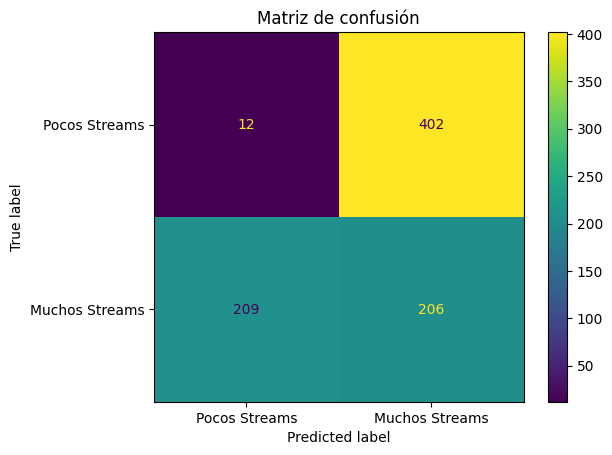

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Random Forest DB1
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth=250

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB1[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB1.streams_Bin

# Crear un modelo de clasificación (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=250)

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.1906


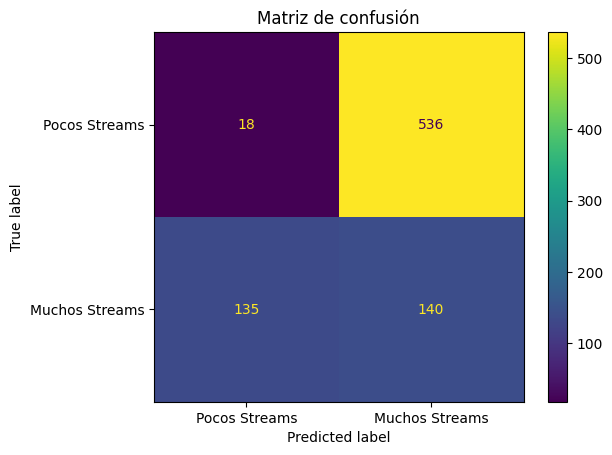

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB1[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB1.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.1906
Max Depth: 50, Precisión del modelo: 0.1906
Max Depth: 75, Precisión del modelo: 0.1906
Max Depth: 100, Precisión del modelo: 0.1906
Max Depth: 125, Precisión del modelo: 0.1906
Max Depth: 150, Precisión del modelo: 0.1906
Max Depth: 175, Precisión del modelo: 0.1906
Max Depth: 200, Precisión del modelo: 0.1906
Max Depth: 225, Precisión del modelo: 0.1906
Max Depth: 250, Precisión del modelo: 0.1906


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


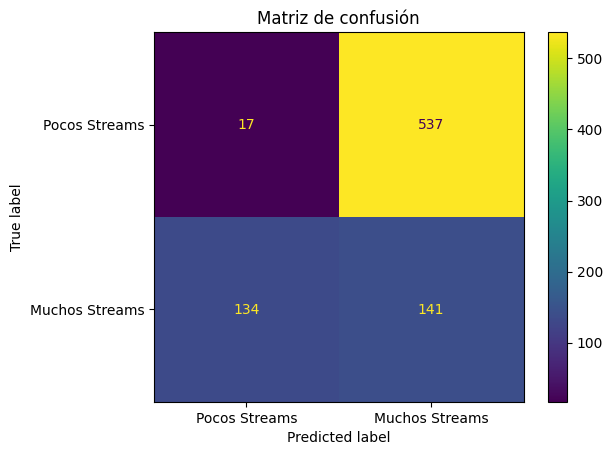

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- max_iter= (25 - 250) aumentando de 25
- penalty='l2'
- solver='liblinear'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB1[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB1.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.1906
Max Depth: 50, Precisión del modelo: 0.1906
Max Depth: 75, Precisión del modelo: 0.1906
Max Depth: 100, Precisión del modelo: 0.1906
Max Depth: 125, Precisión del modelo: 0.1906
Max Depth: 150, Precisión del modelo: 0.1906
Max Depth: 175, Precisión del modelo: 0.1906
Max Depth: 200, Precisión del modelo: 0.1906
Max Depth: 225, Precisión del modelo: 0.1906
Max Depth: 250, Precisión del modelo: 0.1906


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


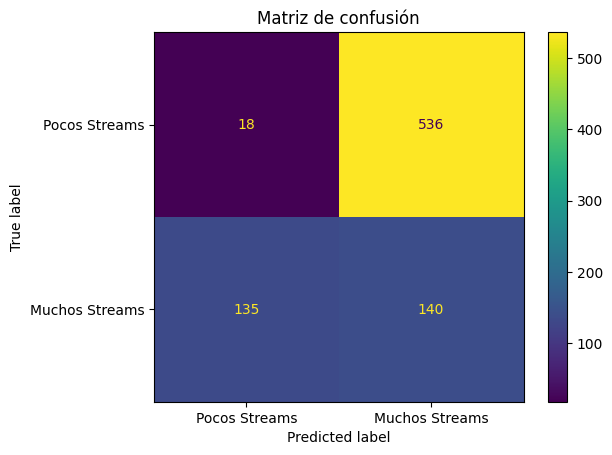

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Random Forest DB2
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth=250

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB2[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB2.streams_Bin

# Crear un modelo de clasificación (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=250)

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.2364


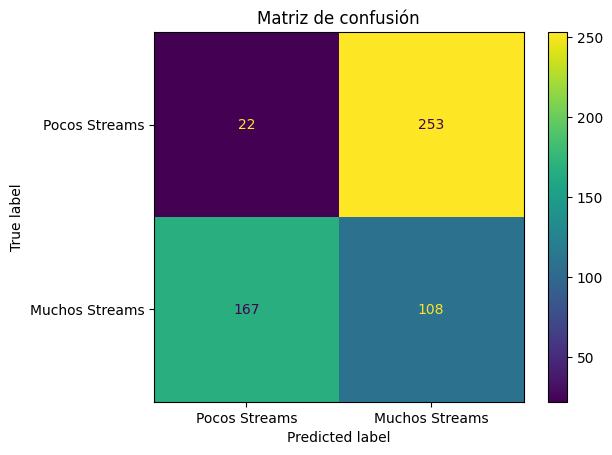

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth= (25 - 250) aumentando de 25

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB2[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB2.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.2364
Max Depth: 50, Precisión del modelo: 0.2364
Max Depth: 75, Precisión del modelo: 0.2364
Max Depth: 100, Precisión del modelo: 0.2364
Max Depth: 125, Precisión del modelo: 0.2364
Max Depth: 150, Precisión del modelo: 0.2364
Max Depth: 175, Precisión del modelo: 0.2364
Max Depth: 200, Precisión del modelo: 0.2364
Max Depth: 225, Precisión del modelo: 0.2364
Max Depth: 250, Precisión del modelo: 0.2364


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


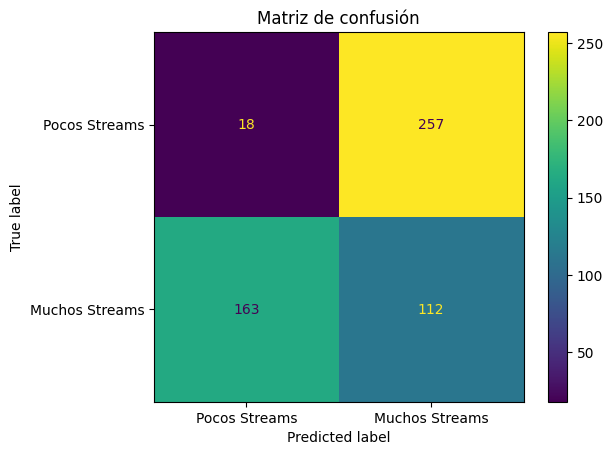

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth= (25 - 250) aumentando de 25

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB2[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB2.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.2364
Max Depth: 50, Precisión del modelo: 0.2364
Max Depth: 75, Precisión del modelo: 0.2364
Max Depth: 100, Precisión del modelo: 0.2364
Max Depth: 125, Precisión del modelo: 0.2364
Max Depth: 150, Precisión del modelo: 0.2364
Max Depth: 175, Precisión del modelo: 0.2364
Max Depth: 200, Precisión del modelo: 0.2364
Max Depth: 225, Precisión del modelo: 0.2364
Max Depth: 250, Precisión del modelo: 0.2364


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


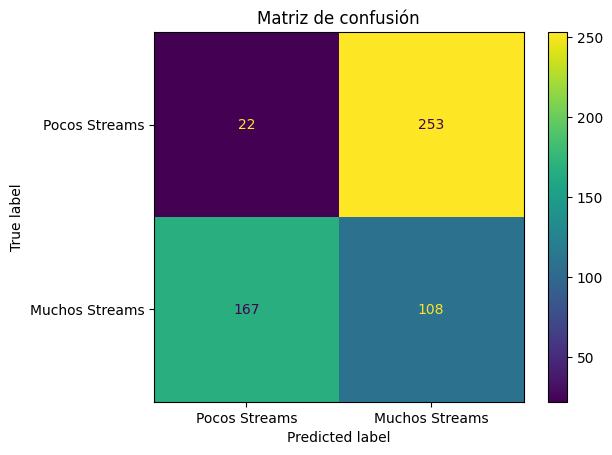

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Random Forest DB3
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth=250

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB3[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB3.streams_Bin

# Crear un modelo de clasificación (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=250)

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.1056


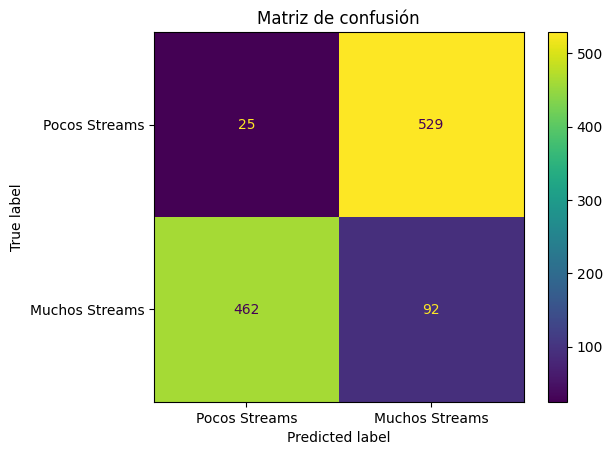

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth= (25 - 250) aumentando de 25

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB3[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB3.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.0993
Max Depth: 50, Precisión del modelo: 0.0993
Max Depth: 75, Precisión del modelo: 0.0993
Max Depth: 100, Precisión del modelo: 0.0993
Max Depth: 125, Precisión del modelo: 0.0993
Max Depth: 150, Precisión del modelo: 0.0993
Max Depth: 175, Precisión del modelo: 0.0993
Max Depth: 200, Precisión del modelo: 0.0993
Max Depth: 225, Precisión del modelo: 0.0993
Max Depth: 250, Precisión del modelo: 0.0993


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


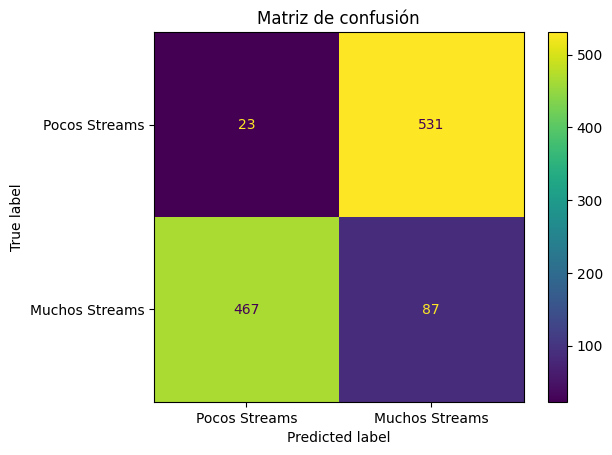

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth= (25 - 250) aumentando de 25

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB3[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB3.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.1056
Max Depth: 50, Precisión del modelo: 0.1056
Max Depth: 75, Precisión del modelo: 0.1056
Max Depth: 100, Precisión del modelo: 0.1056
Max Depth: 125, Precisión del modelo: 0.1056
Max Depth: 150, Precisión del modelo: 0.1056
Max Depth: 175, Precisión del modelo: 0.1056
Max Depth: 200, Precisión del modelo: 0.1056
Max Depth: 225, Precisión del modelo: 0.1056
Max Depth: 250, Precisión del modelo: 0.1056


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


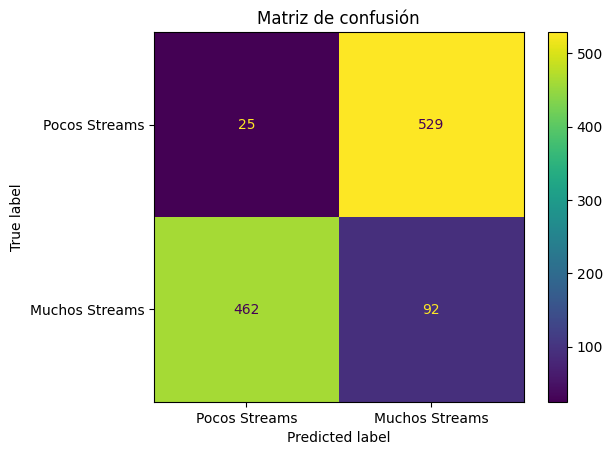

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Modelo de Random Forest DB4
Teniendo en cuenta la comparativa entre los hiperparametros, se propone variar únicamente un hiperparametro a la vez, para observar e identificar cual de estos generar mejor resultado, y a partir de los mejores resultados proceder a variar el segundo hiperparametro.  

### Default
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth=250

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Cargar un conjunto de datos
X = df_DB4[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB4.streams_Bin

# Crear un modelo de clasificación (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=250)

# Especificar el esquema de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

# Extracción del primer elemento del Accuracy
# Índice del elemento que deseas obtener de cada lista interna
indice_elemento = 0

# Formar una lista con el elemento específico de cada lista interna
y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

umbral = 0.2
pred = y_pred >= umbral
pred = pred + [0] * len(pred)

# Calculo de Accuracy
accuracy = accuracy_score(y, pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.2304


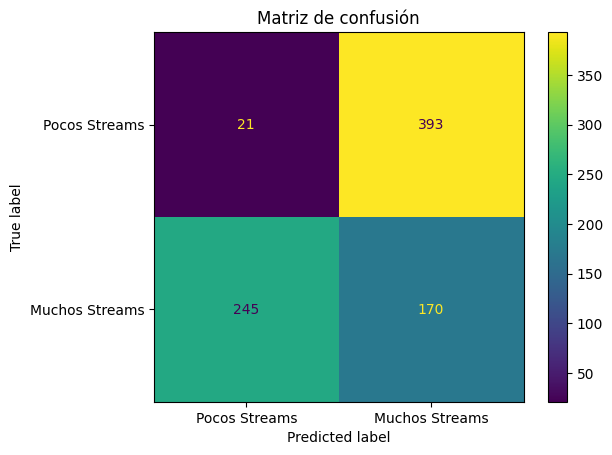

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del primer hiperparametro
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth= (25 - 250) aumentando de 25

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB4[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB4.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.2376
Max Depth: 50, Precisión del modelo: 0.2376
Max Depth: 75, Precisión del modelo: 0.2376
Max Depth: 100, Precisión del modelo: 0.2376
Max Depth: 125, Precisión del modelo: 0.2376
Max Depth: 150, Precisión del modelo: 0.2376
Max Depth: 175, Precisión del modelo: 0.2376
Max Depth: 200, Precisión del modelo: 0.2376
Max Depth: 225, Precisión del modelo: 0.2376
Max Depth: 250, Precisión del modelo: 0.2376


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


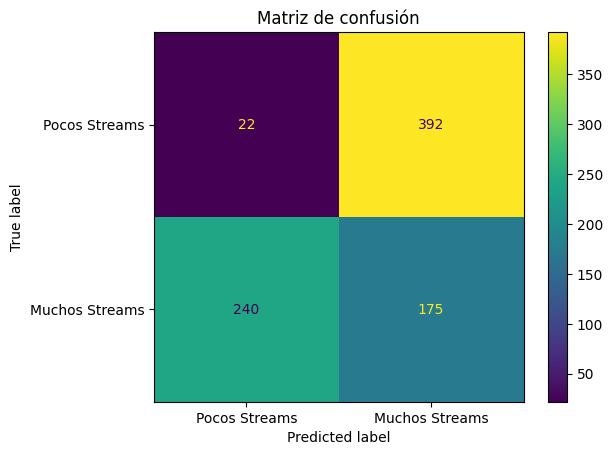

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

### Variación del segundo hiperparametro
Configuraciones del modelo:
- n_estimators=100
- criterion='entropy'
- random_state=42
- max_depth= (25 - 250) aumentando de 25

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_array = np.zeros(len(y))
accu_array = []

# Cargar un conjunto de datos
X = df_DB4[['in_spotify_playlists',	'in_apple_playlists',	'in_deezer_playlists']]
y = df_DB4.streams_Bin

for depth in range(25, 251, 25):
  # Crear un modelo de clasificación (Regresión Logística)
  modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=depth)

  # Especificar el esquema de validación cruzada
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la validación cruzada
  y_pred = cross_val_predict(modelo, X, y, cv=kf, method='predict_proba')

  # Extracción del primer elemento del Accuracy
  # Índice del elemento que deseas obtener de cada lista interna
  indice_elemento = 0

  # Formar una lista con el elemento específico de cada lista interna
  y_pred = np.array([sublista[indice_elemento] for sublista in y_pred])

  # Guardando resultados
  y_pred_array = np.vstack((y_pred_array, y_pred))

  # Conversión a binario
  umbral = 0.2
  pred = y_pred >= umbral
  pred = pred + [0] * len(pred)

  # Calculo de Accuracy
  accuracy = accuracy_score(y, pred)

  accu_array.append(accuracy)

  print(f"Max Depth: {depth}, Precisión del modelo: {accuracy:.4f}")

Max Depth: 25, Precisión del modelo: 0.2316
Max Depth: 50, Precisión del modelo: 0.2304
Max Depth: 75, Precisión del modelo: 0.2304
Max Depth: 100, Precisión del modelo: 0.2304
Max Depth: 125, Precisión del modelo: 0.2304
Max Depth: 150, Precisión del modelo: 0.2304
Max Depth: 175, Precisión del modelo: 0.2304
Max Depth: 200, Precisión del modelo: 0.2304
Max Depth: 225, Precisión del modelo: 0.2304
Max Depth: 250, Precisión del modelo: 0.2304


In [ ]:
# Posición del mejor Accuracy
posicion_maximo = np.argmax(accu_array)
posicion_maximo += 1

# Conversión a binario
umbral = 0.2
pred = y_pred_array[posicion_maximo] >= umbral
pred = pred + [0] * len(pred)


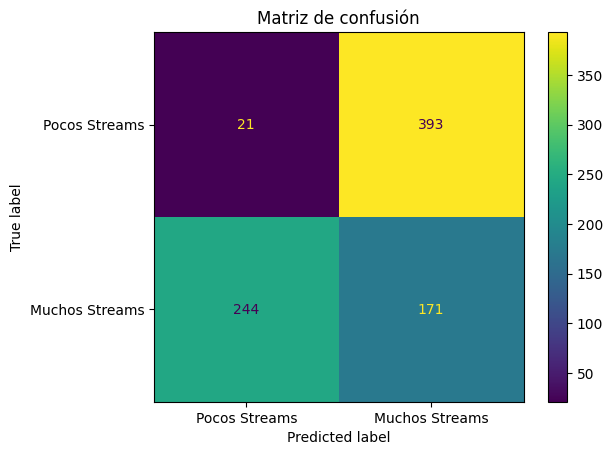

In [ ]:
from sklearn import metrics

matriz = metrics.confusion_matrix(y, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title("Matriz de confusión")
plt.show()

## Analisis de resultados

En este apartado se hablará sobre los resultados, decisiones y elementos tenidos en cuenta para el desarrollo de la actividad; y auqneu se hable o mencione datos relacionados cuantitativos no se justifica o resalta el rendimiento de los modelos obtenidos.

- Es necesario tener en cuenta que durante la primera etapa del ejercicio que es la exploración y análisis de los datos, se halla en algunas variables la combinación de datos no numéricos con tipo objeto o string lo cual en una vista superficial no era tan evidente.
- La prioridad de evidentificar los datos que eran nulos permitio sentar una dirección de cuales herramientas utilizar teniendo como prioridad no perder una gran cantidad de datos y en el caso dado explorar la manera de recuperar datos.
- Durante la etapa de limpieza de los datos y debido a al origen de los mismo, se opto por eliminar todos aquellos datos nulos.
- Durante la categorización o elaboración de la variable dependiente se examino con detalle que variable de medida central utilizar, aunque se emplearon ambas, se recomendaría utilizar la mediana, ya que esta no es tan sensible a datos que posee cantidad grandes y pequeñas.
- Con continuidad del punto anterior, al emplear la media se presenta un desbalance con los datos por lo que se realizó a modo de ejercicio un submuestreo y sobremuestro para balancear la base de datos.
- Debido tambien a la poca cantidad de datos a trabajar < a 1500 datos, se tomo la decisión de trabajar con validación cruzada, esto permitiría utilizar mayor cantidad de datos para el entrenamiento y al variar los datos de prueba y entramiento brinda al modelo mayor robustes.
- Se emplearon dos modelos de clasificación, Regresión Logística y Random Forest, aunque ambos poseen un comportamiento totalmente diferente los resultados de clasificación se ajustaron dentro de un rango muy similar.
- Algunas limitaciones que se tuvo fueron las pocas variables independientes empleadas, esto como resultado de la matriz de correlación.
- Debido a las pocas variables categoricas del ejercicio y su presunta poca relación con el objetivo del análisis no se pudo dar uso de estas durante el desarrollo.
- La principal variables de estudio fue el Accuracy, este fue el eje central para validar el rendimiento del modelo.
- La elección de los modelos se atribuye en primera instancia a su facil interprestación.

## Conclusiones

Las conclusiones a continuación descritas no tienen como objetivo resaltar el rendimiento de los modelos, sino, se hace enfasis en la estrategias empleadas, algunas caracteristicas que pueden visualizarse de los resultados, modos de operación e incluso, posibles mejoras o sugerencias que pueden tenerse en cuenta al momento de realizar tareas de esta cualidades:

- A primera vista es posible identificar que nos encontramos con un ejercicio o tarea que requiere de muchas iteraciones o repeticiones para adapatar de la mejor forma un modelo, por lo que se hace necesario programar o estructurar el proyecto de tal forma que se pueda obtener información con menos lineas de código.
- Es indispensable tener claridad como se almacena los resultados temporales o resultados de cada iteración para un posterior análisis, ya que el objetivo de jugar con los parametros o hiperparametros es el de hallar la o las mejores configuración, en rendimiento y eficacía.
- Aunque en el desarrollo del ejericio se emplea una única variable de medición referente al rendimiento, Accuracy, es necesario explorar más estimadores que permitan evuluar desde diferentes opticas el rendimiento que posee el modelo.
- Tambien se considera que el procedimiento de exploración y análisis de las variables independientes puede enriquecerse con más herramientas y estrategias vistas en la sección.
- En terminos de los resultados, es posible mencionar que tener presente las caracteristicas de la base de datos permite utilizar de manera correcta las medidas de tendencia central e incluso evitar procesos que puedan adicionar errores al modelo.
- Aunque se halla empleado dos modelos, es necesario resaltar que la tarea requiere trabajar con otros modelos e incluso volver a revisar las variables iniciales, generando la oportunidad de perfilar de manera más precisa el modelo final.
- Durante el desarrollo del ejercico se evitaron ciertos procesos como el PCA, debido a que al emplearlo se pierde la posiblidad de justificar el comportamiento del modelo. Además, debido a los resultados de la matriz de correlación donde matemáticamente se recomendaba trabajar con tres variables independientes se considero inadecuado la aplicación del PCA.  
Aunque no se puede validar con exactitud, es posible mencionar que en las diferentes pruebas para el caso de las cuatro bases de datos formadas, se obtuvo un mejor desempeño con la DB4 y en segundo puesto la DB3, esto se pudo suceder por la cantidad de información disponible y el tener balanceada la base de datos de las variables independientes.
- Aunque se trabajo de forma similar la base de datos balanceadas y desbalanceadas posee diferentes forma de verificar su rendimiento.